In [19]:
from PIL import Image
import bs4
import os
import pytesseract
import sys

In [20]:
config = ('--psm 4 -c tessedit_create_hocr=1')


In [21]:
for filename in os.listdir("."):
    if str(filename) not in ['.','..']:
        nameParts = str(filename).split(".")

In [22]:
if nameParts[-1].lower() in ["gif", "png", "jpg", "jpeg"]:
    print("Found file " + str(filename))

In [45]:
image = Image.open("testfile.png").copy()

In [24]:
image.show()

In [25]:
pytesseract.tesseract_cmd = '/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'
text = pytesseract.image_to_string(image, lang='kor')
print(text)

주 간식
주간식단표
60209)   60300   60460   60569)   60603)   607(퇴
팽이된장국 | 얼큰종나물무국 | 미역국    유부국 | 오바두부된장국
김치든불고기 ㅣ 영야채부음밥   보쌈 | 자드보44라스피게티| 동갈비킴치찜
어묵볶음    짜장     상주     피글    오이무침
증식 | 오이열무검절이 | 오이야새무침 ㅣ 간장고주지 | 느타리버슷야처유융| 양념켓잎지
옹나물무침   단무지   속주나물무침 ㅣ 가지무침 . | 견과듀멸치뷰음
야체샐러드 | 정경채무짐 | 야제샐러드 ㅣ 야제샐러드 ㅣ 야체셀러드
김치    야제샐러드    김치     김치     김치

김치




In [41]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import imutils
import cv2
import re
import requests
import numpy as np

In [42]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [49]:

buffer = io.BytesIO()
image.save(buffer, format = 'PNG')
buffer.seek(0)
image_data = buffer.getvalue()

In [51]:
nparr = np.frombuffer(image_data, np.uint8)
org_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

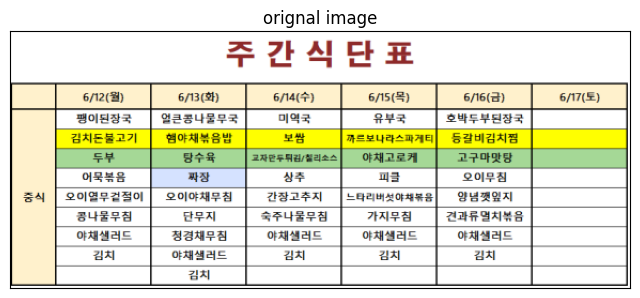

In [52]:
plt_imshow("orignal image", org_image)

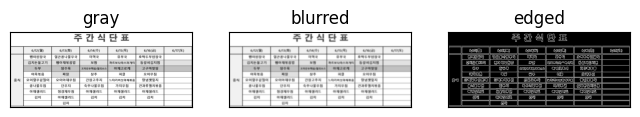

In [55]:
image = org_image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5,), 0)
edged = cv2.Canny(blurred, 75, 200)

plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

In [61]:
options = "--psm 4"
text = pytesseract.image_to_string(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), config=options, lang='kor')
 
# OCR결과 출력
print("[INFO] OCR결과:")
print("==================")
print(text)
print("\n")

[INFO] OCR결과:
주간식단표

[내
60209)          60300          60460          60569)          60602)          00(퇴
팽이된장국 | 얼큰종나물무국 | 미역국            유부국 | 오바두부된장국
김치든불고기 ㅣ 영야채부음밥          보쌈 | 자드보44라스피게티| 동갈비킴치찜
어묵볶음            짜장              상주              피글            오이무침
증시 | 오이영무겉절이 ㅣ 오이야채무첨 ㅣ 간장고주지 ]느타리버섯아서유응| - 양념켓일지
옹나물무침     단무지    속주나물무침 ㅣ 가지무침 . | 견과듀멸치뷰음
야체샐러드 | 정경채무짐 | 야제샐러드 ㅣ 야제샐러드 ㅣ 야체셀러드
김치           야제샐러드           김치              김치              김치

김치




